## NAME: THOMAS AMO KYEIMIAH 
-----

```STUDENT ID: 261121054```

```COURSE: ATOC 558```

```LAB 2```


```QUESTION 1```

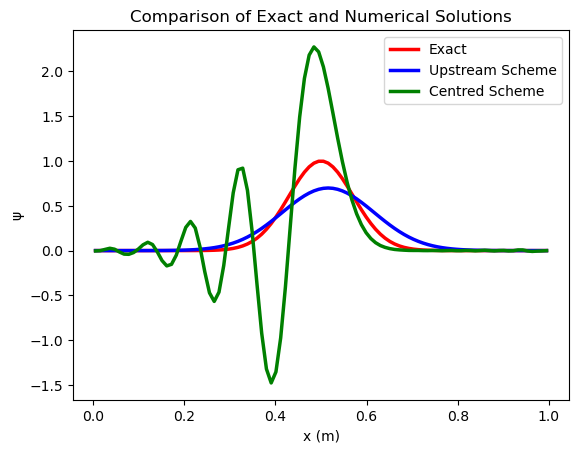

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = 0.5 * dx / c

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# FFT solution - Exact
k = 2 * np.pi * np.arange(Nx) / Lx
num_sol_fft = fft(f(x))
num_sol_fft *= np.exp(-1j * k * c * Lx / c)
exact_sol = np.real(ifft(num_sol_fft))

# Upstream scheme solution
num_sol_up = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol_up[1:] = num_sol_up[1:] - c * dt / dx * (num_sol_up[1:] - num_sol_up[:-1])
    num_sol_up[0] = num_sol_up[-1]

# Centred scheme solution
num_sol_centred = f(x)
for t in np.arange(0, Lx/c, dt):
    num_sol_centred[1:-1] = num_sol_centred[1:-1] - c * dt / (2 * dx) * (num_sol_centred[2:] - num_sol_centred[:-2])
    num_sol_centred[0] = num_sol_centred[-2]
    num_sol_centred[-1] = num_sol_centred[1]

# Plotting
plt.plot(x, exact_sol, label='Exact', color='red', linewidth=2.5)
plt.plot(x, num_sol_up, label='Upstream Scheme', color='blue', linewidth=2.5)
plt.plot(x, num_sol_centred, label='Centred Scheme', color='green', linewidth=2.5)
plt.legend()
plt.xlabel('x (m)')
plt.ylabel('ψ')
plt.title('Comparison of Exact and Numerical Solutions')
plt.savefig('graph11.jpg', dpi=300)
plt.show()

```QUESTION 2```

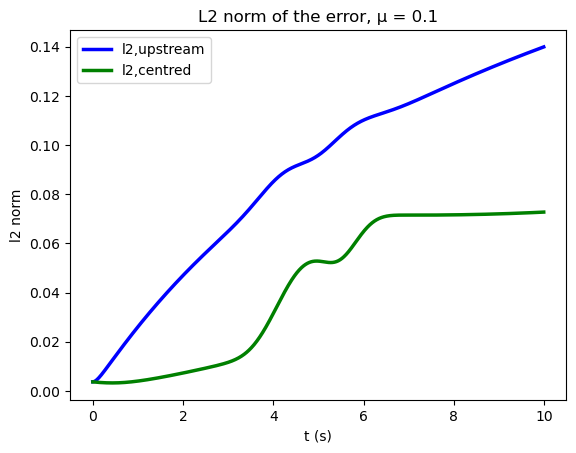

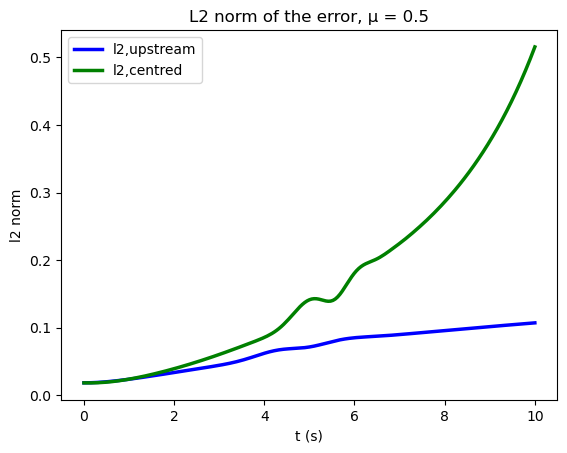

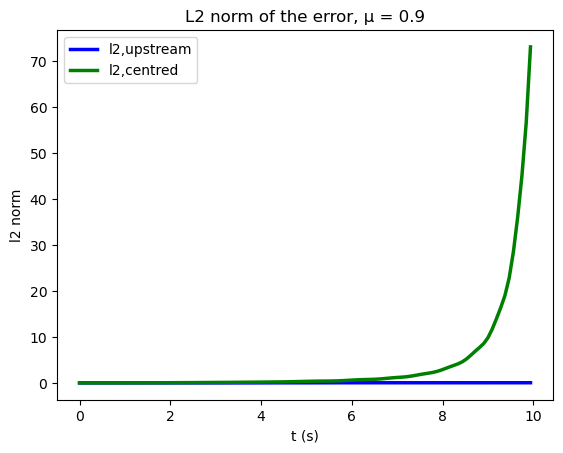

In [2]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
c = 0.1 # m/s
Lx = 1.0 # m
a = 0.1 * Lx
Nx = 96
dx = Lx / Nx
dt = [0.1, 0.5, 0.9]

# Staggered periodic grid
x = np.linspace(-dx/2, Lx + dx/2, Nx + 2)
x = x[1:-1]

# Initial condition
def f(x):
    return np.exp(-((x - Lx/2)**2) / a**2)

# Exact solution at t = Lx/c
def exact_sol(x, t):
    return f((x - c * t + Lx) % Lx)

# Defining my error function
def l2_norm(exact, num):
    return np.sqrt(np.sum((exact - num)**2) * dx)
   
# Loop over different values of dt
for d in dt:
    dtt = d * dx / c
    
    # Time
    t = np.arange(0, Lx/c, dtt)
    
    # Upstream scheme solution
    num_sol_up = f(x)
    error_up = []
    for i in range(len(t)):
        num_sol_up[1:] = num_sol_up[1:] - c * dtt / dx * (num_sol_up[1:] - num_sol_up[:-1])
        num_sol_up[0] = num_sol_up[-1]
        error_up.append(l2_norm(exact_sol(x, t[i]), num_sol_up))
    
    # Centred scheme solution
    num_sol_centred = f(x)
    error_centred = []
    for i in range(len(t)):
        num_sol_centred[1:-1] = num_sol_centred[1:-1] - c * dtt / (2 * dx) * (num_sol_centred[2:] - num_sol_centred[:-2])
        num_sol_centred[0] = num_sol_centred[-2]
        num_sol_centred[-1] = num_sol_centred[1]
        error_centred.append(l2_norm(exact_sol(x, t[i]), num_sol_centred))
    
    # Plotting
    plt.plot(t, error_up, label='l2,upstream', color='blue', linewidth=2.5)
    plt.plot(t, error_centred, label='l2,centred', color='green', linewidth=2.5)
    plt.legend()
    plt.xlabel('t (s)')
    plt.ylabel('l2 norm')
    plt.title(f'L2 norm of the error, μ = {d}')
    plt.savefig('graph'+ str(d)+'.jpg', dpi=300)
    plt.show()

```QUESTION 4```

For $\mu$ = 0.1, the error was largest for the upstream scheme, but for $\mu$ = 0.5 and 0.9 the largest error was seen in the centred scheme. At $\mu$ = 0.9, the centred scheme experienced exponential growth. The upstream scheme has first-order accuracy in both space and time, meaning that the error grows linearly with both the time step size and spatial step size. On the other hand, the centred scheme has a second-order accuracy in space and first-order accuracy in time, meaning that the error grows linearly with time step size and quadratically with spatial step size. This indicates that while the upstream scheme was less accurate, it was stable for all $\mu$ values, while the centred scheme was unstable. However, at $\mu$ = 0.1, the centred scheme had minimal error compared to the upstream scheme as it had a higher accuracy in space